In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [127]:
Train_data = pd.read_csv(r"C:\Users\reddy\Downloads\data assingnment files\Assingnment files\XGBM & LGBM\Titanic_train.csv")
Test_data = pd.read_csv(r"C:\Users\reddy\Downloads\data assingnment files\Assingnment files\XGBM & LGBM\Titanic_test.csv")

In [129]:
Train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [131]:
Test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### checking for missing values

In [134]:
Train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [136]:
Test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# 3. Data Exploration (Histograms, Box plots)

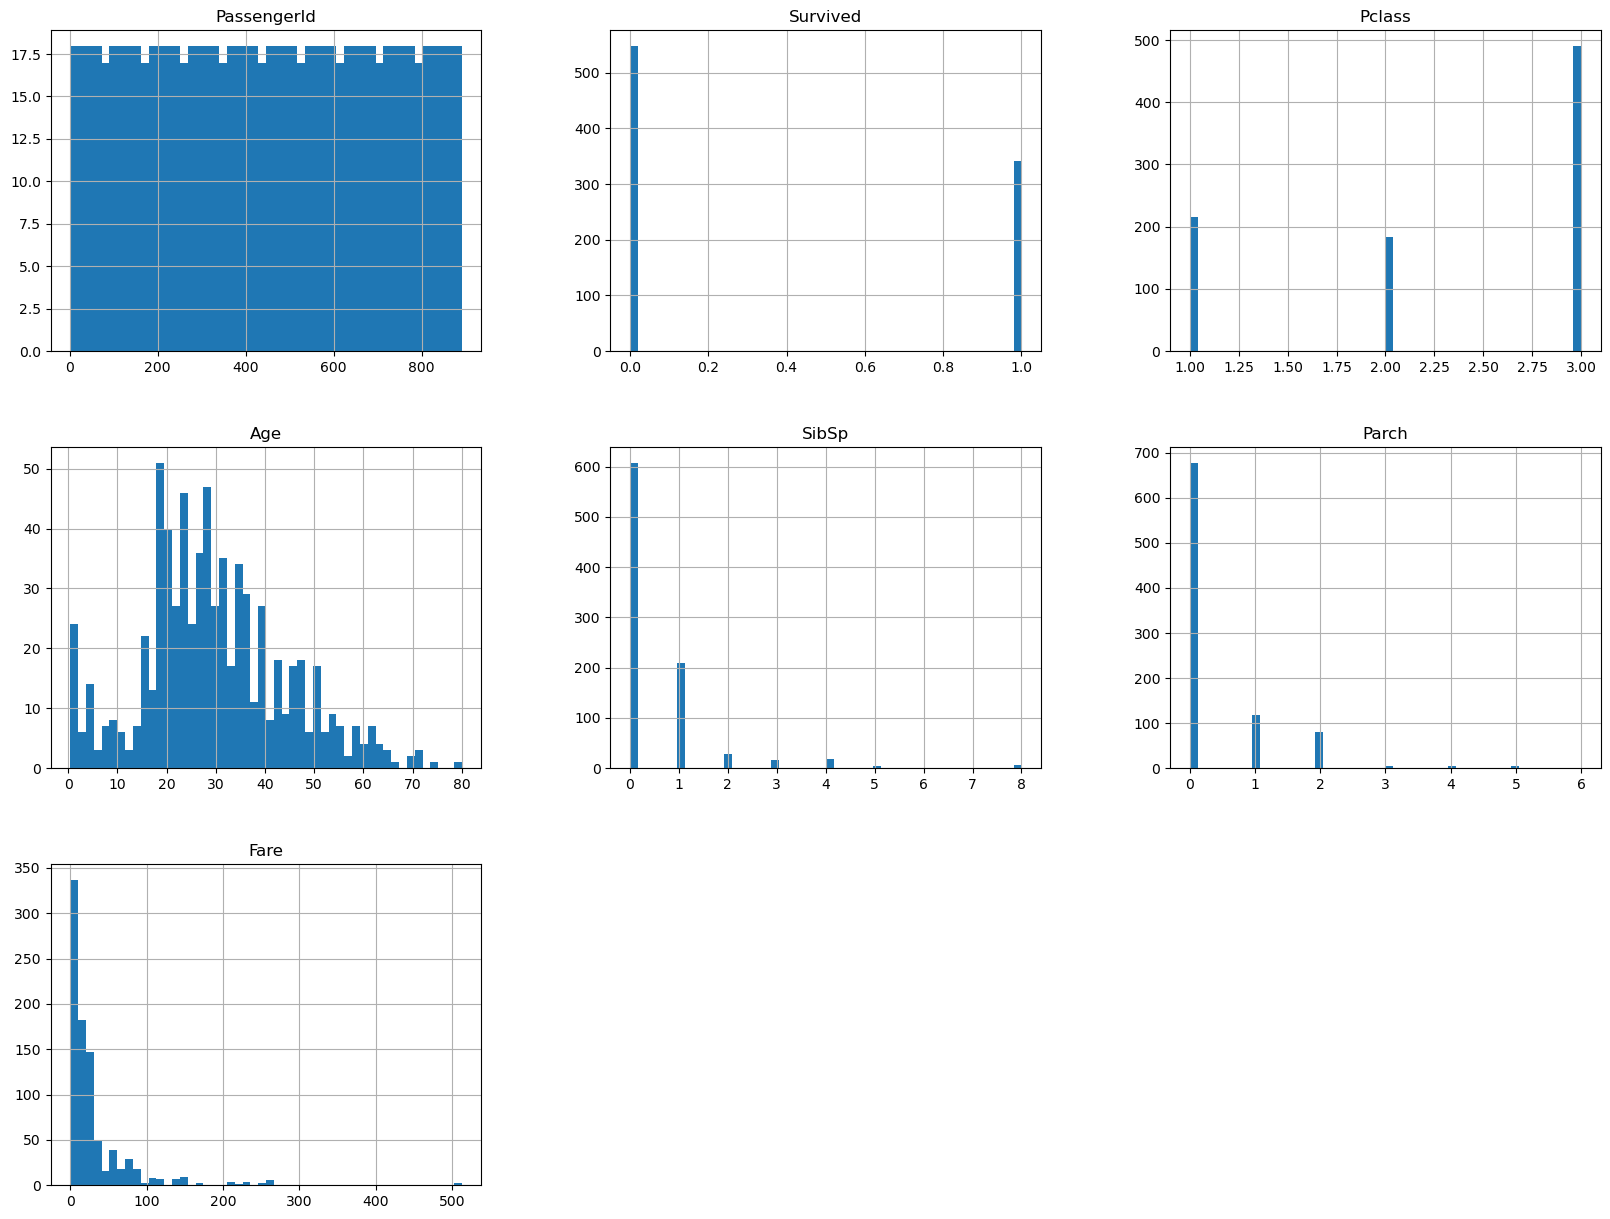

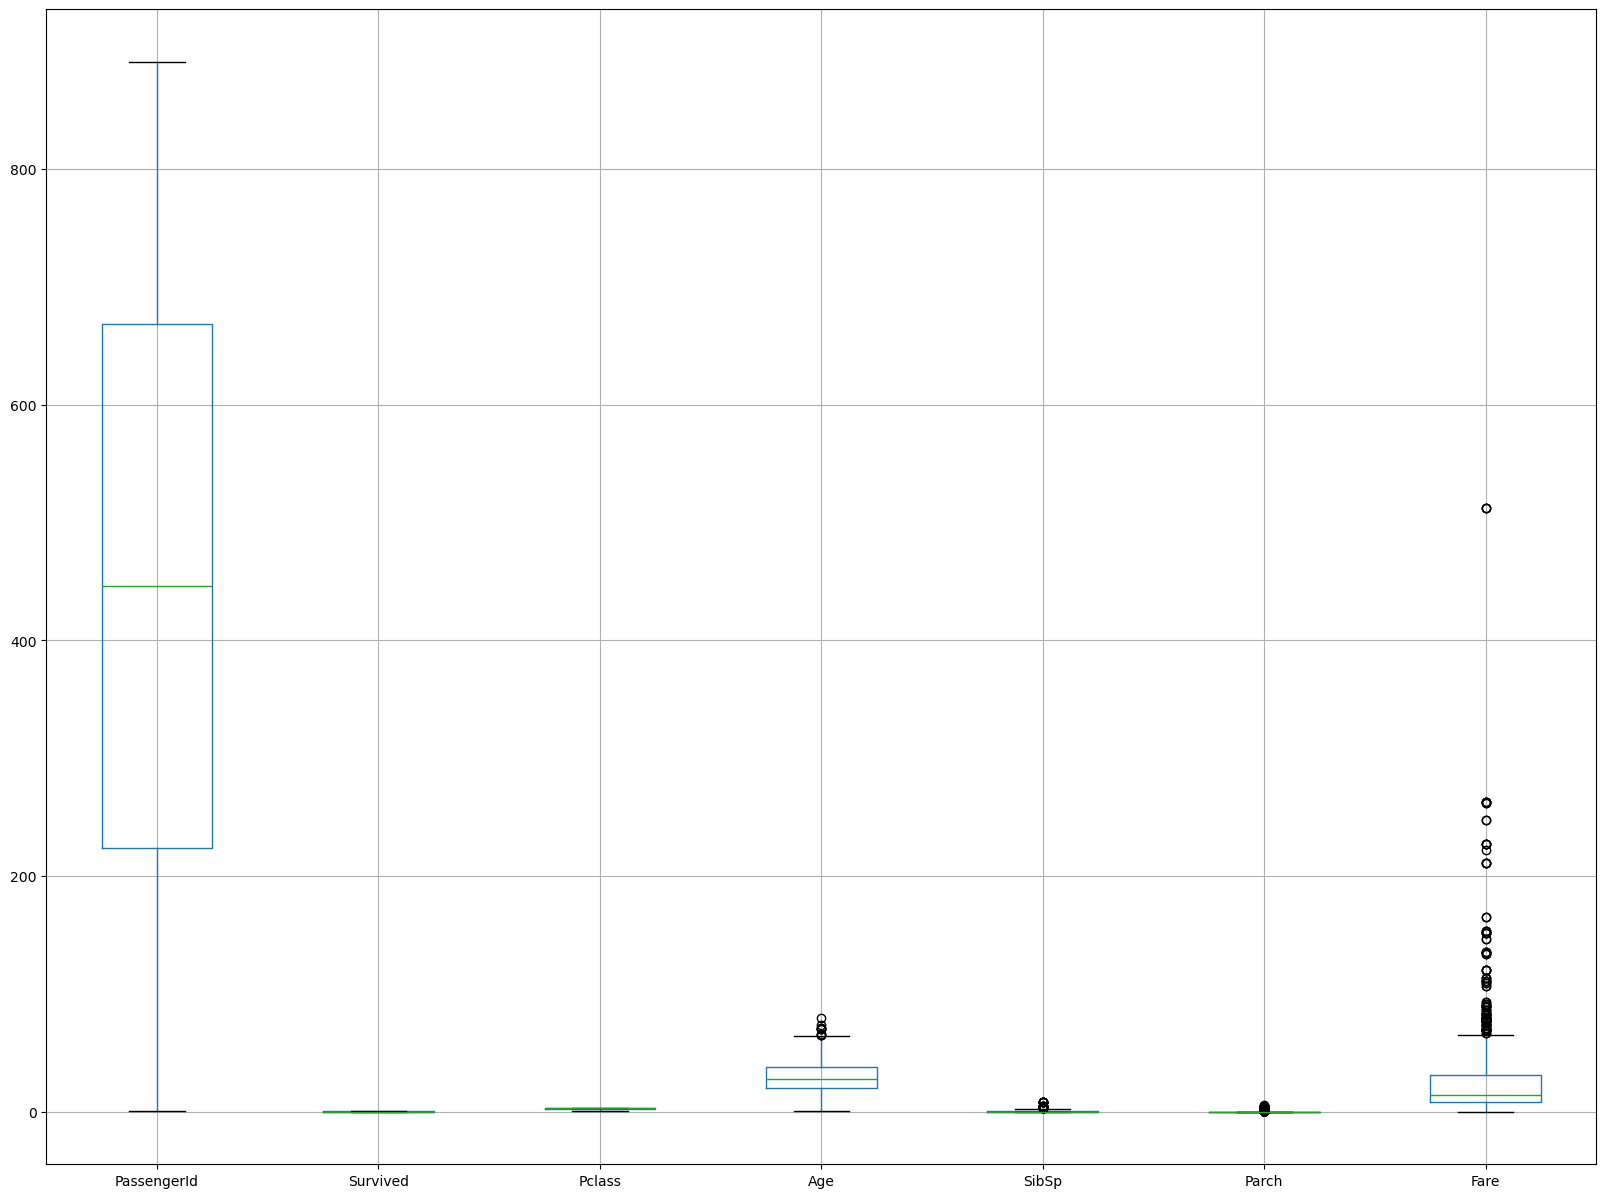

In [139]:
# Train data
Train_data.hist(bins=50, figsize=(20,15))
plt.show()

Train_data.boxplot(figsize=(20,15))
plt.show()

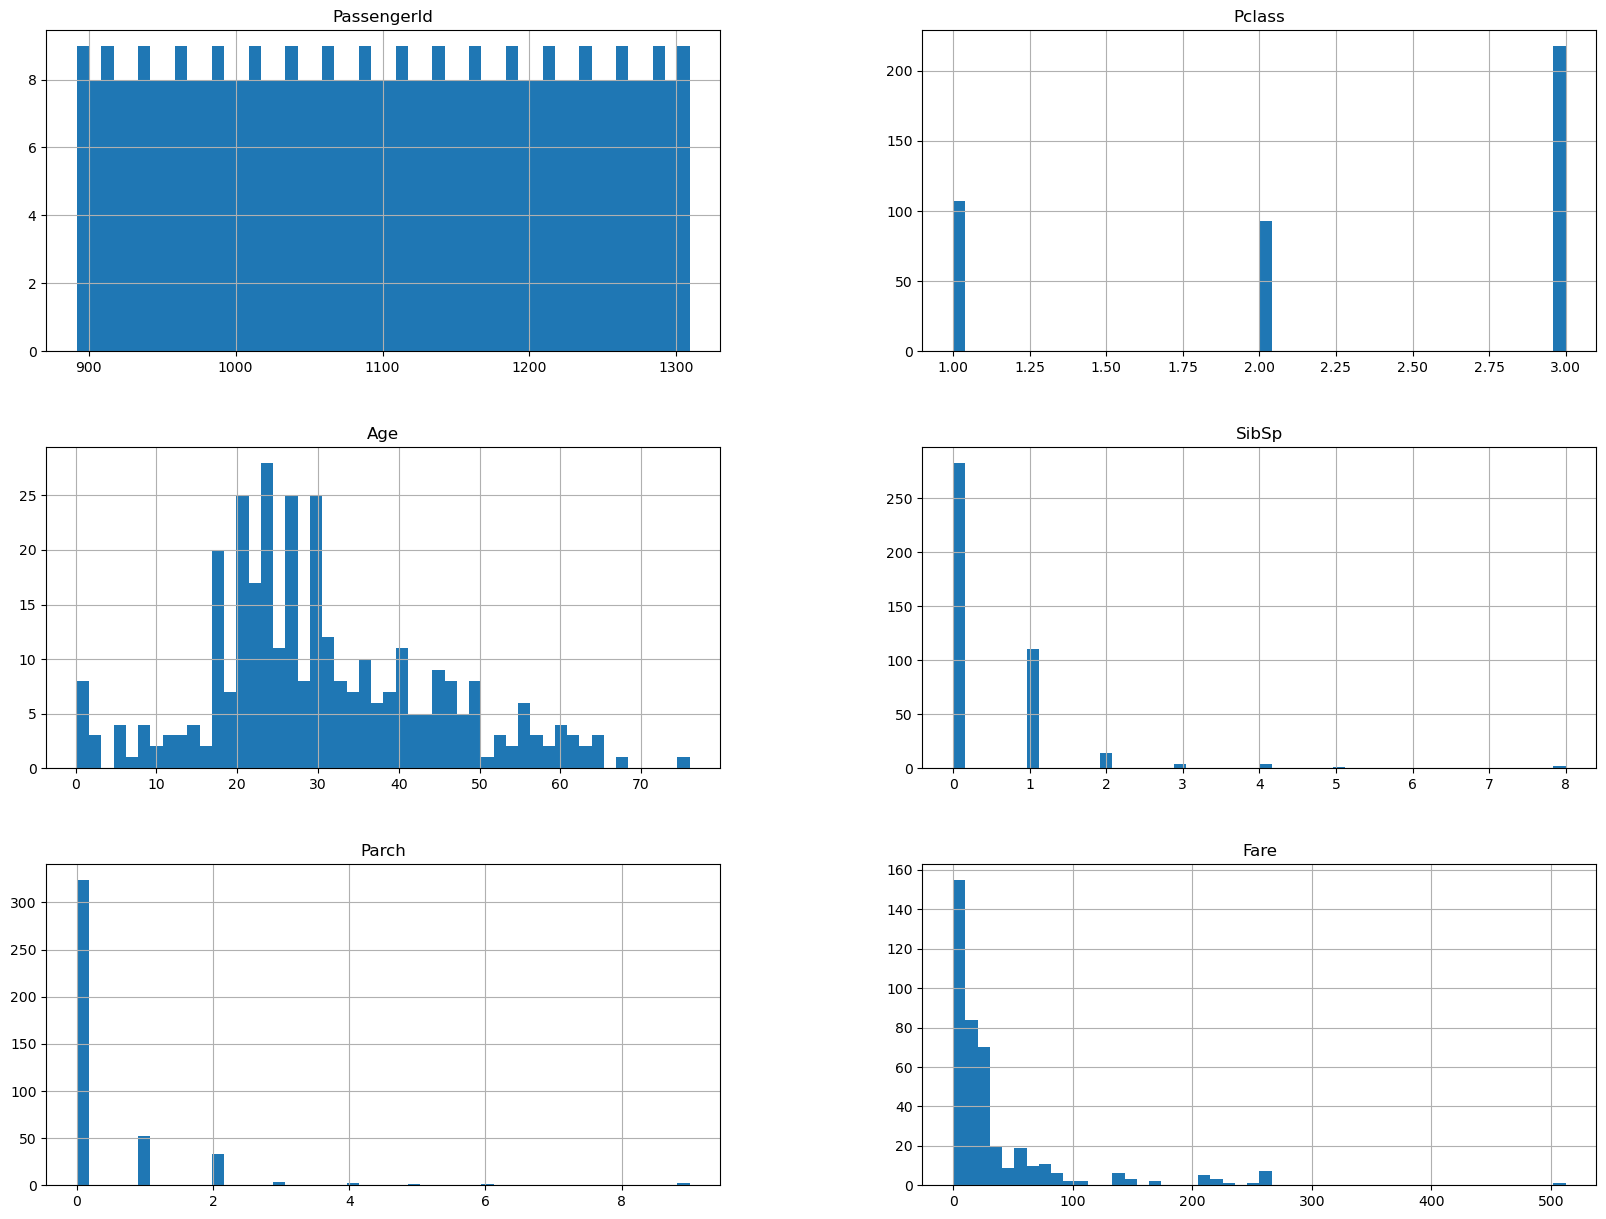

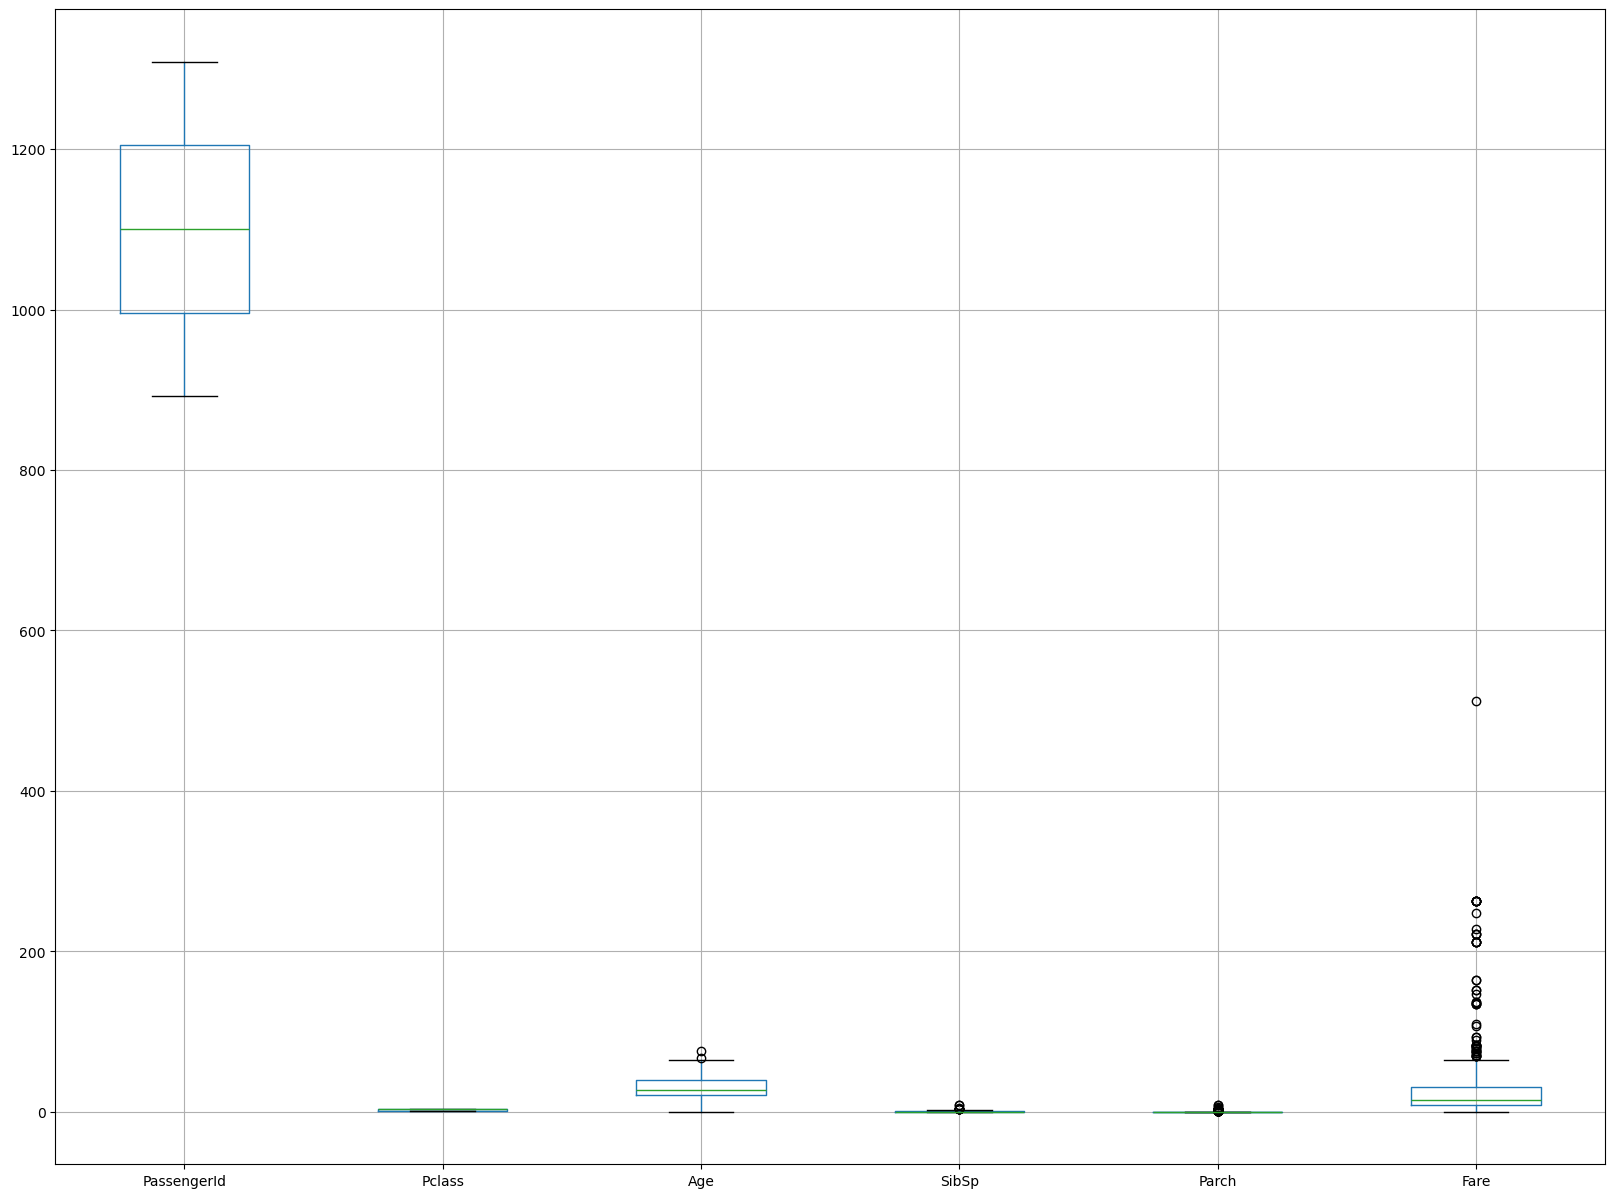

In [140]:
# Test_data
Test_data.hist(bins=50, figsize=(20,15))
plt.show()

Test_data.boxplot(figsize=(20,15))
plt.show()

# 4. Data Relationships - Scatter and Bar Plots

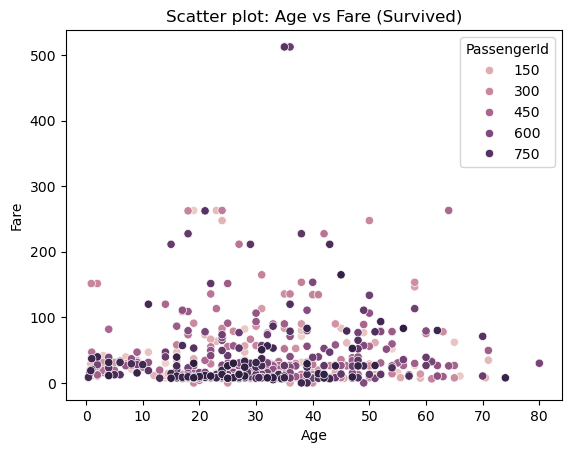

In [142]:
sns.scatterplot(x='Age', y='Fare', hue='PassengerId', data=Train_data)
plt.title("Scatter plot: Age vs Fare (Survived)")
plt.show()

sns.barplot(x='Sex', y='PassengerId', data=Train_data)
plt.title("Bar plot: Survival by Sex")
plt.show()

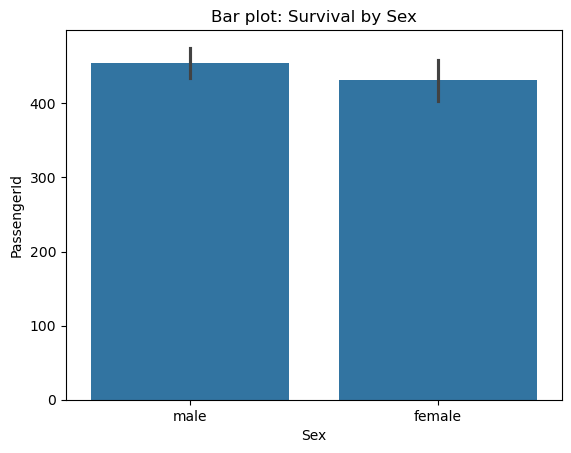

In [144]:
sns.barplot(x='Sex', y='PassengerId', data=Train_data)
plt.title("Bar plot: Survival by Sex")
plt.show()

In [145]:
Train_data.drop(columns='Survived',inplace=True)

# Data Preprocessing

In [148]:
# Impute missing values for Train_data
mean_train = Train_data['Age'].mean()
median_train = Train_data['Age'].median()
mode_train1 = Train_data['Cabin'].mode()
mode_train2 = Train_data['Embarked'].mode()

In [149]:
Train_data.fillna({'Age':mean_train,'Cabin':mode_train1[0],'Embarked':mode_train2[0]},inplace=True)

In [150]:
Train_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [151]:
# Impute missing values for Test_data
mode_test = Test_data['Cabin'].mode()
median_test = Test_data['Age'].median()
mean_test = Test_data['Age'].mean()

In [152]:
Test_data.fillna({'Age':mean_test,'Cabin':mode_test[0]},inplace=True)

In [154]:
Test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

### To find numerical columns and categrical columns saperately train data

In [161]:
Num_col_train = [i for i in Train_data.columns if Train_data[i].dtype != 'O']
Num_col_train

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [166]:
cat_col_train = [i for i in Train_data.columns if Train_data[i].dtype == 'O']
cat_col_train

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

### To find numerical columns and categrical columns saperately test data.

In [169]:
Num_col_test = [i for i in Test_data.columns if Test_data[i].dtype != 'O']
Num_col_test

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [172]:
cat_col_test = [i for i in Test_data.columns if Test_data[i].dtype == 'O']
cat_col_test

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

### Saperation of target and features.

In [175]:
X_train = Train_data
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


### convertion of categrical data into numerical for train data .

In [178]:
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [180]:
ord_end =make_pipeline(OrdinalEncoder())

In [182]:
trans = ColumnTransformer([('ordinal',ord_end,cat_col_train)])
trans

ColumnTransformer(transformers=[('ordinal',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Name', 'Sex', 'Ticket', 'Cabin',
                                  'Embarked'])])

In [184]:
df1_train_col=pd.DataFrame(trans.fit_transform(X_train))
df1_train_col

,0,1,2,3,4
0,108.0,1.0,523.0,47.0,2.0
1,190.0,0.0,596.0,81.0,0.0
2,353.0,0.0,669.0,47.0,2.0
3,272.0,0.0,49.0,55.0,2.0
4,15.0,1.0,472.0,47.0,2.0
...,...,...,...,...,...
886,548.0,1.0,101.0,47.0,2.0
887,303.0,0.0,14.0,30.0,2.0
888,413.0,0.0,675.0,47.0,2.0
889,81.0,1.0,8.0,60.0,0.0


### Apllying standardscalar for numerical columns train data.

In [187]:
std = StandardScaler()

In [189]:
df1_train_Num = pd.DataFrame(std.fit_transform(X_train[Num_col_train]))
df1_train_Num

,0,1,2,3,4,5
0,-1.730108,0.827377,-0.592481,0.432793,-0.473674,-0.502445
1,-1.726220,-1.566107,0.638789,0.432793,-0.473674,0.786845
2,-1.722332,0.827377,-0.284663,-0.474545,-0.473674,-0.488854
3,-1.718444,-1.566107,0.407926,0.432793,-0.473674,0.420730
4,-1.714556,0.827377,0.407926,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...
886,1.714556,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671
887,1.718444,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381
888,1.722332,0.827377,0.000000,0.432793,2.008933,-0.176263
889,1.726220,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381


### To combine numerical and categrical columns.

In [192]:
freatures1 = pd.concat([df1_train_col,df1_train_Num],axis=1,ignore_index=True)
old_name = range(0,5)
new_name = cat_col_train
old_name1 = range(5,11)
new_name1 = Num_col_train
x2_train = freatures1.rename(columns=dict(zip(old_name,new_name)))
x2_train

,Name,Sex,Ticket,Cabin,Embarked,5,6,7,8,9,10
0,108.0,1.0,523.0,47.0,2.0,-1.730108,0.827377,-0.592481,0.432793,-0.473674,-0.502445
1,190.0,0.0,596.0,81.0,0.0,-1.726220,-1.566107,0.638789,0.432793,-0.473674,0.786845
2,353.0,0.0,669.0,47.0,2.0,-1.722332,0.827377,-0.284663,-0.474545,-0.473674,-0.488854
3,272.0,0.0,49.0,55.0,2.0,-1.718444,-1.566107,0.407926,0.432793,-0.473674,0.420730
4,15.0,1.0,472.0,47.0,2.0,-1.714556,0.827377,0.407926,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...
886,548.0,1.0,101.0,47.0,2.0,1.714556,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671
887,303.0,0.0,14.0,30.0,2.0,1.718444,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381
888,413.0,0.0,675.0,47.0,2.0,1.722332,0.827377,0.000000,0.432793,2.008933,-0.176263
889,81.0,1.0,8.0,60.0,0.0,1.726220,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381


In [194]:
x2_train = x2_train.rename(columns=dict(zip(old_name1,new_name1)))
x2_train

,Name,Sex,Ticket,Cabin,Embarked,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,108.0,1.0,523.0,47.0,2.0,-1.730108,0.827377,-0.592481,0.432793,-0.473674,-0.502445
1,190.0,0.0,596.0,81.0,0.0,-1.726220,-1.566107,0.638789,0.432793,-0.473674,0.786845
2,353.0,0.0,669.0,47.0,2.0,-1.722332,0.827377,-0.284663,-0.474545,-0.473674,-0.488854
3,272.0,0.0,49.0,55.0,2.0,-1.718444,-1.566107,0.407926,0.432793,-0.473674,0.420730
4,15.0,1.0,472.0,47.0,2.0,-1.714556,0.827377,0.407926,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...
886,548.0,1.0,101.0,47.0,2.0,1.714556,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671
887,303.0,0.0,14.0,30.0,2.0,1.718444,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381
888,413.0,0.0,675.0,47.0,2.0,1.722332,0.827377,0.000000,0.432793,2.008933,-0.176263
889,81.0,1.0,8.0,60.0,0.0,1.726220,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381


### convertion of categrical data into numerical for test data .

In [197]:
ord_endt = make_pipeline(OrdinalEncoder())

In [199]:
transd = ColumnTransformer([('ordinal',ord_endt,cat_col_test)])
transd

ColumnTransformer(transformers=[('ordinal',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Name', 'Sex', 'Ticket', 'Cabin',
                                  'Embarked'])])

In [201]:
df2_col_test = pd.DataFrame(transd.fit_transform(Test_data))
df2_col_test

,0,1,2,3,4
0,206.0,1.0,152.0,15.0,1.0
1,403.0,0.0,221.0,15.0,2.0
2,269.0,1.0,73.0,15.0,1.0
3,408.0,1.0,147.0,15.0,2.0
4,178.0,0.0,138.0,15.0,2.0
...,...,...,...,...,...
413,353.0,1.0,267.0,15.0,2.0
414,283.0,0.0,324.0,22.0,0.0
415,332.0,1.0,346.0,15.0,2.0
416,384.0,1.0,220.0,15.0,2.0


### Apllying standardscalar for numerical columns for test data.

In [204]:
stdq = StandardScaler()

In [206]:
df2_num_test = pd.DataFrame(stdq.fit_transform(Test_data[Num_col_test]))
df2_num_test 

,0,1,2,3,4,5
0,-1.727912,0.873482,0.334993,-0.499470,-0.400248,-0.497811
1,-1.719625,0.873482,1.325530,0.616992,-0.400248,-0.512660
2,-1.711337,-0.315819,2.514175,-0.499470,-0.400248,-0.464532
3,-1.703050,0.873482,-0.259330,-0.499470,-0.400248,-0.482888
4,-1.694763,0.873482,-0.655545,0.616992,0.619896,-0.417971
...,...,...,...,...,...,...
413,1.694763,0.873482,0.000000,-0.499470,-0.400248,-0.493856
414,1.703050,-1.505120,0.691586,-0.499470,-0.400248,1.312180
415,1.711337,0.873482,0.651965,-0.499470,-0.400248,-0.508183
416,1.719625,0.873482,0.000000,-0.499470,-0.400248,-0.493856


### To combine numerical and categrical columns.

In [209]:
fraturs2 = pd.concat([df2_col_test,df2_num_test],axis=1,ignore_index=True)
olds_name = range(0,5)
news_name = cat_col_train
olds_name1 = range(5,11)
news_name1 = Num_col_train
x2_test = freatures1.rename(columns=dict(zip(olds_name,news_name)))
x2_test

,Name,Sex,Ticket,Cabin,Embarked,5,6,7,8,9,10
0,108.0,1.0,523.0,47.0,2.0,-1.730108,0.827377,-0.592481,0.432793,-0.473674,-0.502445
1,190.0,0.0,596.0,81.0,0.0,-1.726220,-1.566107,0.638789,0.432793,-0.473674,0.786845
2,353.0,0.0,669.0,47.0,2.0,-1.722332,0.827377,-0.284663,-0.474545,-0.473674,-0.488854
3,272.0,0.0,49.0,55.0,2.0,-1.718444,-1.566107,0.407926,0.432793,-0.473674,0.420730
4,15.0,1.0,472.0,47.0,2.0,-1.714556,0.827377,0.407926,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...
886,548.0,1.0,101.0,47.0,2.0,1.714556,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671
887,303.0,0.0,14.0,30.0,2.0,1.718444,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381
888,413.0,0.0,675.0,47.0,2.0,1.722332,0.827377,0.000000,0.432793,2.008933,-0.176263
889,81.0,1.0,8.0,60.0,0.0,1.726220,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381


In [211]:
x2_test = x2_test.rename(columns=dict(zip(olds_name1,news_name1)))
x2_test

,Name,Sex,Ticket,Cabin,Embarked,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,108.0,1.0,523.0,47.0,2.0,-1.730108,0.827377,-0.592481,0.432793,-0.473674,-0.502445
1,190.0,0.0,596.0,81.0,0.0,-1.726220,-1.566107,0.638789,0.432793,-0.473674,0.786845
2,353.0,0.0,669.0,47.0,2.0,-1.722332,0.827377,-0.284663,-0.474545,-0.473674,-0.488854
3,272.0,0.0,49.0,55.0,2.0,-1.718444,-1.566107,0.407926,0.432793,-0.473674,0.420730
4,15.0,1.0,472.0,47.0,2.0,-1.714556,0.827377,0.407926,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...
886,548.0,1.0,101.0,47.0,2.0,1.714556,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671
887,303.0,0.0,14.0,30.0,2.0,1.718444,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381
888,413.0,0.0,675.0,47.0,2.0,1.722332,0.827377,0.000000,0.432793,2.008933,-0.176263
889,81.0,1.0,8.0,60.0,0.0,1.726220,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381


In [213]:
df= pd.read_csv(r"C:\Users\reddy\Downloads\data assingnment files\Assingnment files\XGBM & LGBM\Titanic_train.csv")

# Building Predictive Models

In [216]:
y_train = df[['Survived']]

In [218]:
x2_train,y_train,x2_test

(      Name  Sex  Ticket  Cabin  Embarked  PassengerId    Pclass       Age  \
 0    108.0  1.0   523.0   47.0       2.0    -1.730108  0.827377 -0.592481   
 1    190.0  0.0   596.0   81.0       0.0    -1.726220 -1.566107  0.638789   
 2    353.0  0.0   669.0   47.0       2.0    -1.722332  0.827377 -0.284663   
 3    272.0  0.0    49.0   55.0       2.0    -1.718444 -1.566107  0.407926   
 4     15.0  1.0   472.0   47.0       2.0    -1.714556  0.827377  0.407926   
 ..     ...  ...     ...    ...       ...          ...       ...       ...   
 886  548.0  1.0   101.0   47.0       2.0     1.714556 -0.369365 -0.207709   
 887  303.0  0.0    14.0   30.0       2.0     1.718444 -1.566107 -0.823344   
 888  413.0  0.0   675.0   47.0       2.0     1.722332  0.827377  0.000000   
 889   81.0  1.0     8.0   60.0       0.0     1.726220 -1.566107 -0.284663   
 890  220.0  1.0   466.0   47.0       1.0     1.730108  0.827377  0.177063   
 
         SibSp     Parch      Fare  
 0    0.432793 -0.473674 

In [265]:
# LightGBM Model
lgb_model = lgb.LGBMRegressor()

In [267]:
lgb_model.fit(x2_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1052
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 11
[LightGBM] [Info] Start training from score 0.383838


LGBMRegressor()

In [269]:
y_pred_lgb = lgb_model.predict(x2_train)

In [275]:
y_pred_lgb_labels = (y_pred_lgb >= 0.5).astype(int)

In [277]:
accuracy_score(y_train,y_pred_lgb_labels)

1.0

In [279]:
# XGBoost Model
xgb_model = xgb.XGBRegressor()

In [281]:
xgb_model.fit(x2_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Evaluate Performance

In [288]:
y_pred_xgb = xgb_model.predict(x2_train)

In [290]:
y_pred_xgb_labels = (y_pred_xgb >= 0.5).astype(int)

In [292]:
accuracy_score(y_train,y_pred_xgb_labels)

1.0

In [231]:
# Evaluation metrics
def evaluate_model(y_test, y_pred, model_name):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # import metrics here to make the function self-contained

    print(f"\nEvaluation Metrics for {model_name}:")
    print(f"Mean Squared Error: {mean_squared_error(y_train, y_pred)}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_pred)}")
    print(f"R-squared: {r2_score(y_train, y_pred)}")

# LightGBM performance
evaluate_model(y_train, y_pred_lgb, "LightGBM")

# XGBoost performance
evaluate_model(y_train, y_pred_xgb, "XGBoost")


Evaluation Metrics for LightGBM:
Mean Squared Error: 0.02089735436583558
Mean Absolute Error: 0.10299308853955798
R-squared: 0.911641514176206

Evaluation Metrics for XGBoost:
Mean Squared Error: 0.0009155346345096423
Mean Absolute Error: 0.01935207383018865
R-squared: 0.9961289167404175


In [233]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# LightGBM performance
evaluate_model(y_train, y_pred_lgb, "LightGBM")

# XGBoost performance
evaluate_model(y_train, y_pred_xgb, "XGBoost")


Evaluation Metrics for LightGBM:
Mean Squared Error: 0.02089735436583558
Mean Absolute Error: 0.10299308853955798
R-squared: 0.911641514176206

Evaluation Metrics for XGBoost:
Mean Squared Error: 0.0009155346345096423
Mean Absolute Error: 0.01935207383018865
R-squared: 0.9961289167404175


# Comparative Analysis

In [300]:
# LightGBM performance
precision = precision_score(y_train,y_pred_lgb_labels)
recall = recall_score(y_train,y_pred_lgb_labels)        
f1 = f1_score(y_train,y_pred_lgb_labels)               

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [298]:
# XGBoost performance
precision = precision_score(y_train,y_pred_xgb_labels)
recall = recall_score(y_train,y_pred_xgb_labels)        
f1 = f1_score(y_train,y_pred_xgb_labels)               

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Precision: 1.0
Recall: 1.0
F1-Score: 1.0


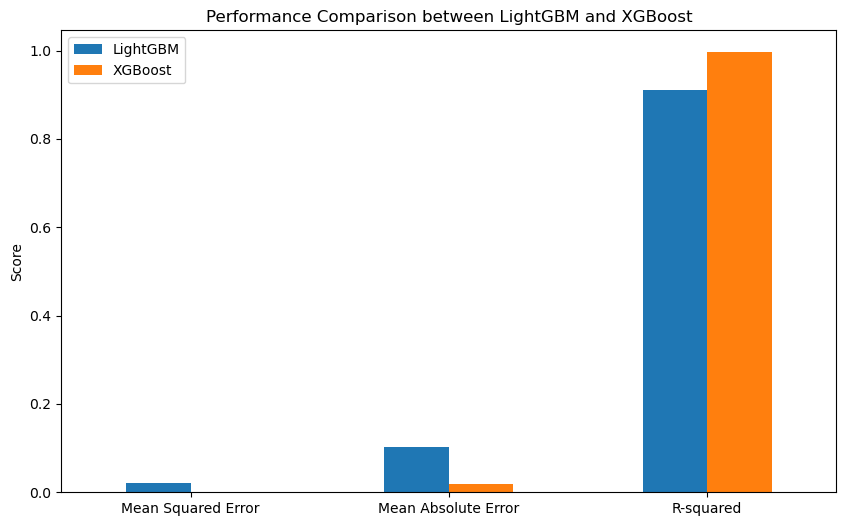

In [302]:
# Visualize the comparison
metrics = {
    'LightGBM': [mean_squared_error(y_train, y_pred_lgb), mean_absolute_error(y_train, y_pred_lgb), r2_score(y_train, y_pred_lgb)],
    'XGBoost': [mean_squared_error(y_train, y_pred_xgb), mean_absolute_error(y_train, y_pred_xgb), r2_score(y_train, y_pred_xgb)]
}

metrics_df = pd.DataFrame(metrics, index=['Mean Squared Error', 'Mean Absolute Error', 'R-squared'])

metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Performance Comparison between LightGBM and XGBoost')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()